In [1]:
# Import the required libriraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all datasets
leads_data = pd.read_csv("leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_data.shape

(9240, 37)

In [4]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data Preparation

In [6]:
# Converting Yes, No fields to Binary values
# List of variables to map
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine','Newspaper Article','X Education Forums','Newspaper',
            'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview',]

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [7]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:
# Checking the percentage of missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [9]:
# Rename long column names
leads_data.rename(columns={'Prospect ID':'ProspectID'}, inplace=True)
leads_data.rename(columns={'Lead Number':'LeadNumber'}, inplace=True)
leads_data.rename(columns={'Lead Origin':'LeadOrigin'}, inplace=True)
leads_data.rename(columns={'Lead Source':'LeadSource'}, inplace=True)
leads_data.rename(columns={'Do Not Email':'NoEmail'}, inplace=True)
leads_data.rename(columns={'Do Not Call':'NoCall'}, inplace=True)
leads_data.rename(columns={'Converted':'Converted'}, inplace=True)
leads_data.rename(columns={'TotalVisits':'TotalVisits'}, inplace=True)
leads_data.rename(columns={'Total Time Spent on Website':'TimeSpent'}, inplace=True)
leads_data.rename(columns={'Page Views Per Visit':'PageVisited'}, inplace=True)
leads_data.rename(columns={'Last Activity':'LastActivity'}, inplace=True)
leads_data.rename(columns={'Country':'Country'}, inplace=True)
leads_data.rename(columns={'Specialization':'Specialization'}, inplace=True)
leads_data.rename(columns={'How did you hear about X Education':'Source'}, inplace=True)
leads_data.rename(columns={'What is your current occupation':'Occupation'}, inplace=True)
leads_data.rename(columns={'What matters most to you in choosing a course':'MattersMost'}, inplace=True)
leads_data.rename(columns={'Search':'Search'}, inplace=True)
leads_data.rename(columns={'Magazine':'Magazine'}, inplace=True)
leads_data.rename(columns={'Newspaper Article':'Article'}, inplace=True)
leads_data.rename(columns={'X Education Forums':'Forums'}, inplace=True)
leads_data.rename(columns={'Newspaper':'Newspaper'}, inplace=True)
leads_data.rename(columns={'Digital Advertisement':'DigitalAd'}, inplace=True)
leads_data.rename(columns={'Through Recommendations':'Recommendations'}, inplace=True)
leads_data.rename(columns={'Receive More Updates About Our Courses':'ReceiveUpdates'}, inplace=True)
leads_data.rename(columns={'Tags':'Tags'}, inplace=True)
leads_data.rename(columns={'Lead Quality':'LeadQuality'}, inplace=True)
leads_data.rename(columns={'Update me on Supply Chain Content':'SupplyChain'}, inplace=True)
leads_data.rename(columns={'Get updates on DM Content':'DMContent'}, inplace=True)
leads_data.rename(columns={'Lead Profile':'LeadProfile'}, inplace=True)
leads_data.rename(columns={'City':'City'}, inplace=True)
leads_data.rename(columns={'Asymmetrique Activity Index':'ActivityIndex'}, inplace=True)
leads_data.rename(columns={'Asymmetrique Profile Index':'ProfileIndex'}, inplace=True)
leads_data.rename(columns={'Asymmetrique Activity Score':'ActivityScore'}, inplace=True)
leads_data.rename(columns={'Asymmetrique Profile Score':'ProfileScore'}, inplace=True)
leads_data.rename(columns={'I agree to pay the amount through cheque':'ChequePayment'}, inplace=True)
leads_data.rename(columns={'A free copy of Mastering The Interview':'FreeCopy'}, inplace=True)
leads_data.rename(columns={'Last Notable Activity':'NotableActivity'}, inplace=True)

In [10]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProspectID       9240 non-null   object 
 1   LeadNumber       9240 non-null   int64  
 2   LeadOrigin       9240 non-null   object 
 3   LeadSource       9204 non-null   object 
 4   NoEmail          9240 non-null   int64  
 5   NoCall           9240 non-null   int64  
 6   Converted        9240 non-null   int64  
 7   TotalVisits      9103 non-null   float64
 8   TimeSpent        9240 non-null   int64  
 9   PageVisited      9103 non-null   float64
 10  LastActivity     9137 non-null   object 
 11  Country          6779 non-null   object 
 12  Specialization   7802 non-null   object 
 13  Source           7033 non-null   object 
 14  Occupation       6550 non-null   object 
 15  MattersMost      6531 non-null   object 
 16  Search           9240 non-null   int64  
 17  Magazine      

# Treating null values in each coloumn.  Also try to group the less frequent values to others


In [11]:
leads_data['LeadSource'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
testone                 1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
Name: LeadSource, dtype: int64

In [12]:
leads_data['LeadSource'].fillna('OtherSource', inplace=True)
leads_data['LeadSource']=leads_data['LeadSource'].replace(['bing','Click2call','Social Media','Press_Release','Live Chat','Pay per Click Ads',
                                    'WeLearn','welearnblog_Home','youtubechannel','NC_EDM','blog','testone'], 'OtherSource')
leads_data['LeadSource']=leads_data['LeadSource'].replace(['google'],'Google')
leads_data['LeadSource'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
OtherSource           59
Facebook              55
Name: LeadSource, dtype: int64

In [13]:
leads_data['LastActivity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: LastActivity, dtype: int64

In [14]:
leads_data['LastActivity'].fillna('Noactivity', inplace=True)
leads_data['LastActivity']=leads_data['LastActivity'].replace(['Unreachable','Unsubscribed',
                                                                'Had a Phone Conversation','Approached upfront',
                                                                'View in browser link Clicked','Email Marked Spam','Email Received',
                                                                'Resubscribed to emails','Visited Booth in Tradeshow'], 'NoActivity')
leads_data['LastActivity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
NoActivity                    205
Form Submitted on Website     116
Noactivity                    103
Name: LastActivity, dtype: int64

In [15]:
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Italy                      2
China                      2
Belgium                    2
Ghana                      2
Bangladesh                 2
Denmark                    1
Malaysia                   1
Vietnam                    1
Indonesia                  1
Switzerland                1
Russia                     1
Sri Lanka     

In [16]:
leads_data['Country'].fillna('OtherCountry', inplace=True)
leads_data['Country'].value_counts()

India                   6492
OtherCountry            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
Uganda                     2
Asia/Pacific Region        2
Netherlands                2
Italy                      2
China                      2
Belgium                    2
Ghana                      2
Bangladesh                 2
Denmark                    1
Malaysia                   1
Vietnam                    1
Indonesia                  1
Switzerland                1
Russia        

In [17]:
leads_data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
leads_data['Specialization'].fillna('OtherSpec', inplace=True)
leads_data['Specialization']=leads_data['Specialization'].replace(['Select'], 'OtherSpec')
leads_data['Specialization'].value_counts()

OtherSpec                            3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
leads_data['Source'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: Source, dtype: int64

In [20]:
leads_data['Source'].fillna('OtherSource', inplace=True)
leads_data['Source']=leads_data['Source'].replace(['Select','Other'], 'OtherSource')
leads_data['Source'].value_counts()

OtherSource              7436
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: Source, dtype: int64

In [21]:
leads_data['Occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [22]:
leads_data['Occupation'].fillna('OtherOccupation', inplace=True)
leads_data['Occupation'].value_counts()

Unemployed              5600
OtherOccupation         2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: Occupation, dtype: int64

In [23]:
leads_data['MattersMost'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: MattersMost, dtype: int64

In [24]:
leads_data['MattersMost'].fillna('OtherImportance', inplace=True)
leads_data['MattersMost']=leads_data['MattersMost'].replace(['Flexibility & Convenience','Other'], 'OtherImportance')
leads_data['MattersMost'].value_counts()

Better Career Prospects    6528
OtherImportance            2712
Name: MattersMost, dtype: int64

In [25]:
leads_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [26]:
leads_data['Tags'].fillna('OtherTags', inplace=True)
leads_data['Tags'].value_counts()

OtherTags                                            3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [27]:
leads_data['LeadQuality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: LeadQuality, dtype: int64

In [28]:
leads_data['LeadQuality'].fillna('OtherRelevance', inplace=True)
leads_data['LeadQuality'].value_counts()

OtherRelevance       4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: LeadQuality, dtype: int64

In [29]:
leads_data['LeadProfile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: LeadProfile, dtype: int64

In [30]:
leads_data['LeadProfile'].fillna('OtherProfile', inplace=True)
leads_data['LeadProfile']=leads_data['LeadProfile'].replace(['Select'], 'OtherProfile')
leads_data['LeadProfile'].value_counts()

OtherProfile                   6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: LeadProfile, dtype: int64

In [31]:
leads_data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [32]:
leads_data['City'].fillna('OtherCities', inplace=True)
leads_data['City']=leads_data['City'].replace(['Select'], 'OtherCities')
leads_data['City'].value_counts()

OtherCities                    3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
# Converting High, Medium, Low to numeric values  
# List of variables to map
varlist1 =  ['ActivityIndex', 'ProfileIndex']

# Defining the map function
def severity_map(x):
    return x.map({'01.High': 1, "02.Medium": 2,"03.Low":3})

# Applying the function to the housing list
leads_data[varlist1] = leads_data[varlist1].apply(severity_map)

In [34]:
leads_data['ActivityIndex'].value_counts()

2.0    3839
1.0     821
3.0     362
Name: ActivityIndex, dtype: int64

In [35]:
leads_data['ActivityIndex'].fillna(value = 4, inplace=True)
leads_data['ActivityIndex'].value_counts()

4.0    4218
2.0    3839
1.0     821
3.0     362
Name: ActivityIndex, dtype: int64

In [36]:
leads_data['ProfileIndex'].value_counts()

2.0    2788
1.0    2203
3.0      31
Name: ProfileIndex, dtype: int64

In [37]:
leads_data['ProfileIndex'].fillna(value = 4, inplace=True)
leads_data['ProfileIndex'].value_counts()

4.0    4218
2.0    2788
1.0    2203
3.0      31
Name: ProfileIndex, dtype: int64

In [38]:
leads_data['ActivityScore'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: ActivityScore, dtype: int64

In [39]:
leads_data['ActivityScore'].fillna(value = 0.0, inplace=True)
leads_data['ActivityScore'].value_counts()

0.0     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: ActivityScore, dtype: int64

In [40]:
leads_data['ProfileScore'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: ProfileScore, dtype: int64

In [41]:
leads_data['ProfileScore'].fillna(value = 0.0, inplace=True)
leads_data['ProfileScore'].value_counts()

0.0     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: ProfileScore, dtype: int64

In [42]:
leads_data['NotableActivity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Name: NotableActivity, dtype: int64

In [43]:
leads_data['NotableActivity'].fillna('OtherActivity', inplace=True)
leads_data['NotableActivity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Approached upfront                 1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Name: NotableActivity, dtype: int64

In [44]:
leads_data.head()

,ProspectID,LeadNumber,LeadOrigin,LeadSource,NoEmail,NoCall,Converted,TotalVisits,TimeSpent,PageVisited,...,DMContent,LeadProfile,City,ActivityIndex,ProfileIndex,ActivityScore,ProfileScore,ChequePayment,FreeCopy,NotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,OtherProfile,OtherCities,2.0,2.0,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,OtherProfile,OtherCities,2.0,2.0,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,2.0,1.0,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,OtherProfile,Mumbai,2.0,1.0,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,OtherProfile,Mumbai,2.0,1.0,15.0,18.0,0,0,Modified


In [45]:
leads_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [46]:
leads_data['TotalVisits'].fillna(value = 0.0, inplace=True)
leads_data['TotalVisits'].value_counts()

0.0      2326
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
25.0        5
24.0        5
27.0        5
22.0        3
28.0        2
29.0        2
26.0        2
115.0       1
41.0        1
55.0        1
251.0       1
141.0       1
32.0        1
42.0        1
74.0        1
43.0        1
30.0        1
54.0        1
Name: TotalVisits, dtype: int64

In [47]:
leads_data['PageVisited'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: PageVisited, Length: 114, dtype: int64

In [48]:
leads_data['PageVisited'].fillna(value = 0.0, inplace=True)
leads_data['PageVisited'].value_counts()

0.00    2326
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
2.13       1
4.40       1
6.67       1
8.33       1
2.45       1
Name: PageVisited, Length: 114, dtype: int64

In [49]:
# Checking the percentage of missing values after treating all the null values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

ProspectID         0.0
LeadNumber         0.0
LeadOrigin         0.0
LeadSource         0.0
NoEmail            0.0
NoCall             0.0
Converted          0.0
TotalVisits        0.0
TimeSpent          0.0
PageVisited        0.0
LastActivity       0.0
Country            0.0
Specialization     0.0
Source             0.0
Occupation         0.0
MattersMost        0.0
Search             0.0
Magazine           0.0
Article            0.0
Forums             0.0
Newspaper          0.0
DigitalAd          0.0
Recommendations    0.0
ReceiveUpdates     0.0
Tags               0.0
LeadQuality        0.0
SupplyChain        0.0
DMContent          0.0
LeadProfile        0.0
City               0.0
ActivityIndex      0.0
ProfileIndex       0.0
ActivityScore      0.0
ProfileScore       0.0
ChequePayment      0.0
FreeCopy           0.0
NotableActivity    0.0
dtype: float64

In [50]:
# Take a copy of the original data
leads_data_copy = leads_data.copy()

In [51]:
leads_data_copy.shape

(9240, 37)

# Drop columns with only single value as this does not affect the regression model

In [52]:
leads_data = leads_data.drop(['Magazine','ReceiveUpdates','SupplyChain','DMContent','ChequePayment'], 1)

In [53]:
leads_data.shape

(9240, 32)

In [54]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads_data[['LeadOrigin', 'LeadSource', 'LastActivity', 'Country','Specialization',
                                    'Source','Occupation',
                                    'Tags','LeadQuality','LeadProfile','City',
                                    'ActivityIndex','ProfileIndex',
                                    'NotableActivity','MattersMost']], drop_first=True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy1], axis=1)

In [55]:
# Drop the original columns since we have created the dummies.

leads_data = leads_data.drop(['LeadOrigin', 'LeadSource', 'LastActivity', 'Country','Specialization',
                                    'Source','Occupation',
                                    'Tags','LeadQuality','LeadProfile','City',
                                    'ActivityIndex','ProfileIndex',
                                    'NotableActivity','MattersMost'], 1)

In [56]:
leads_data.shape

(9240, 166)

In [57]:
leads_data.head()

,ProspectID,LeadNumber,NoEmail,NoCall,Converted,TotalVisits,TimeSpent,PageVisited,Search,Article,...,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked,MattersMost_OtherImportance
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [58]:
leads_data.describe()

,LeadNumber,NoEmail,NoCall,Converted,TotalVisits,TimeSpent,PageVisited,Search,Article,Forums,...,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked,MattersMost_OtherImportance
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,...,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.394156,487.698268,2.327787,0.001515,0.000216,0.000108,...,0.001515,0.368723,0.019805,0.034416,0.000108,0.235065,0.003463,0.005087,0.000108,0.293506
std,23405.995698,0.270435,0.014711,0.486714,4.836682,548.021466,2.164258,0.038898,0.014711,0.010403,...,0.038898,0.482485,0.139338,0.182304,0.010403,0.424062,0.058750,0.071142,0.010403,0.455393
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,660737.000000,1.000000,1.000000,1.000000,251.000000,2272.000000,55.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Checking for outliers in continious variables

In [59]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','TimeSpent','PageVisited','ActivityScore','ProfileScore']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,TimeSpent,PageVisited,ActivityScore,ProfileScore
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,3.394156,487.698268,2.327787,7.775541,8.883550
std,4.836682,548.021466,2.164258,7.199329,8.250664
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,0.000000
50%,3.000000,248.000000,2.000000,13.000000,14.000000
75%,5.000000,936.000000,3.000000,14.000000,16.000000
90%,7.000000,1380.000000,5.000000,15.000000,18.000000
95%,10.000000,1562.000000,6.000000,16.000000,19.000000
99%,17.000000,1840.610000,9.000000,17.000000,20.000000


In [60]:
# Outlier values are available in TotalVisits, TimeSpent and Page visited. We will default Median values for these
# outlier values.
median_visits = leads_data.loc[leads_data['TotalVisits']<19, 'TotalVisits'].median()
leads_data["TotalVisits"] = leads_data["TotalVisits"].mask(leads_data["TotalVisits"] >19, median_visits)

median_spent = leads_data.loc[leads_data['TimeSpent']<1850, 'TimeSpent'].median()
leads_data["TimeSpent"] = leads_data["TimeSpent"].mask(leads_data["TimeSpent"] > 1850, median_spent)

median_page = leads_data.loc[leads_data['PageVisited']<10, 'PageVisited'].median()
leads_data["PageVisited"] = leads_data["PageVisited"].mask(leads_data["PageVisited"] > 10, median_page)

In [61]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','TimeSpent','PageVisited','ActivityScore','ProfileScore']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,TimeSpent,PageVisited,ActivityScore,ProfileScore
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,3.197511,472.357143,2.264223,7.775541,8.883550
std,3.078764,530.016760,1.938917,7.199329,8.250664
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,0.000000,0.000000,0.000000
50%,3.000000,245.000000,2.000000,13.000000,14.000000
75%,5.000000,900.250000,3.000000,14.000000,16.000000
90%,7.000000,1351.100000,5.000000,15.000000,18.000000
95%,9.000000,1524.000000,6.000000,16.000000,19.000000
99%,14.000000,1743.610000,8.000000,17.000000,20.000000


In [62]:
# After the outlier treatment, the values are gradually increasing.  Now we can procced with Test and Train split

In [63]:
# Putting feature variable to X
X = leads_data.drop(['LeadNumber','Converted','ProspectID'], axis=1)

X.head()

,NoEmail,NoCall,TotalVisits,TimeSpent,PageVisited,Search,Article,Forums,Newspaper,DigitalAd,...,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked,MattersMost_OtherImportance
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [64]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [66]:
X_train.shape

(6468, 163)

In [67]:
X_train.head()

,NoEmail,NoCall,TotalVisits,TimeSpent,PageVisited,Search,Article,Forums,Newspaper,DigitalAd,...,NotableActivity_Had a Phone Conversation,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,NotableActivity_Page Visited on Website,NotableActivity_Resubscribed to emails,NotableActivity_SMS Sent,NotableActivity_Unreachable,NotableActivity_Unsubscribed,NotableActivity_View in browser link Clicked,MattersMost_OtherImportance
1871,0,0,0.0,0,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0,0,4.0,487,1.33,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0,0,5.0,106,2.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0,0,5.0,1230,5.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3934,0,0,0.0,0,0.00,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
# Apply scaler() to all the columns numerical coloumns

num_vars = ['TotalVisits','TimeSpent','PageVisited','ActivityScore','ProfileScore']
scaler = MinMaxScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [69]:
# Feature Selection using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select= 20)           
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False, False, False,  True, False,
        True,  True,

In [72]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('NoEmail', False, 17),
 ('NoCall', False, 90),
 ('TotalVisits', False, 25),
 ('TimeSpent', True, 1),
 ('PageVisited', False, 26),
 ('Search', False, 37),
 ('Article', False, 112),
 ('Forums', False, 100),
 ('Newspaper', False, 95),
 ('DigitalAd', False, 73),
 ('Recommendations', False, 101),
 ('ActivityScore', True, 1),
 ('ProfileScore', True, 1),
 ('FreeCopy', False, 121),
 ('LeadOrigin_Landing Page Submission', False, 50),
 ('LeadOrigin_Lead Add Form', False, 36),
 ('LeadOrigin_Lead Import', False, 41),
 ('LeadOrigin_Quick Add Form', False, 27),
 ('LeadSource_Facebook', False, 13),
 ('LeadSource_Google', False, 116),
 ('LeadSource_Olark Chat', False, 115),
 ('LeadSource_Organic Search', False, 127),
 ('LeadSource_OtherSource', False, 53),
 ('LeadSource_Reference', False, 86),
 ('LeadSource_Referral Sites', False, 84),
 ('LeadSource_Welingak Website', True, 1),
 ('LastActivity_Email Bounced', False, 47),
 ('LastActivity_Email Link Clicked', False, 32),
 ('LastActivity_Email Opened',

In [73]:
col = X_train.columns[rfe.support_]

In [74]:
X_train.columns[~rfe.support_]

Index(['NoEmail', 'NoCall', 'TotalVisits', 'PageVisited', 'Search', 'Article',
       'Forums', 'Newspaper', 'DigitalAd', 'Recommendations',
       ...
       'NotableActivity_Email Opened', 'NotableActivity_Email Received',
       'NotableActivity_Form Submitted on Website',
       'NotableActivity_Had a Phone Conversation',
       'NotableActivity_Page Visited on Website',
       'NotableActivity_Resubscribed to emails', 'NotableActivity_SMS Sent',
       'NotableActivity_Unreachable', 'NotableActivity_Unsubscribed',
       'NotableActivity_View in browser link Clicked'],
      dtype='object', length=143)

# Assessing models with Stats model

In [75]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1117.1
Date:                Mon, 06 Dec 2021   Deviance:                       2234.1
Time:                        12:44:49   Pearson chi2:                 1.39e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6262
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6768      0.233    -15.765      0.000      -4.134      -3.220
TimeSpent                                    3.0861      0.200     15.468      0.000       2.695       3.477
ActivityScore                                4.5196      0.681      6.634      0.000       3.184       5.855
ProfileScore                                -4.1886      0.675     -6.201      0.000      -5.513      -2.865
LeadSource_Welingak Website                  3.0864      0.750      4.117      0.000       1.617       4.556
LastActivity_SMS Sent                        2.2087      0.131     16.900      0.000       1.953       2.465
Tags_Busy                                    1.6083      0.299      5.386      0.000       1.023       2.194
Tags_Closed by Horizzon                      9.6128      1.032      9.313      0.000       7.590      11.636
Tags_Lateral student                        26.5766   7.43e+04      0.000      1.000   -1.46e+05    1.46e+05
Tags_Lost to EINS                            9.6212      0.793     12.129      0.000       8.067      11.176
Tags_OtherTags                               3.2778      0.241     13.576      0.000       2.805       3.751
Tags_Ringing                                -2.0675      0.302     -6.841      0.000      -2.660      -1.475
Tags_Will revert after reading the email     6.1623      0.266     23.177      0.000       5.641       6.683
Tags_invalid number                         -2.1350      1.063     -2.008      0.045      -4.219      -0.051
Tags_number not provided                   -22.7821   2.39e+04     -0.001      0.999   -4.69e+04    4.69e+04
Tags_switched off                           -2.3432      0.565     -4.145      0.000      -3.451      -1.235
Tags_wrong number given                    -22.5945   2.06e+04     -0.001      0.999   -4.05e+04    4.04e+04
LeadQuality_Worst                           -2.2045      0.703     -3.136      0.002      -3.582      -0.827
NotableActivity_Modified                    -1.5804      0.132    -11.991      0.000      -1.839      -1.322
NotableActivity_Olark Chat Conversation     -1.6972      0.499     -3.404      0.001      -2.674      -0.720
MattersMost_OtherImportance                 -2.6683      0.160    -16.720      0.000      -2.981      -2.356
============================================================================================================
"""

In [76]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
154,NotableActivity_Modified,1846.78
150,NotableActivity_Email Opened,1538.93
158,NotableActivity_SMS Sent,1196.92
46,Country_India,680.73
56,Country_OtherCountry,647.31
...,...,...
51,Country_Liberia,NaN
63,Country_Sri Lanka,NaN
65,Country_Switzerland,NaN
66,Country_Tanzania,NaN


In [77]:
# Dropping highly correlated variables and insignificant variables 

X1 = X_train[col]
# X1 = X1.drop(['Tags_Lateral student','Tags_number not provided','Tags_wrong number given','Tags_Not doing further education'], 1)
X_train_sm = sm.add_constant(X1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1117.1
Date:                Mon, 06 Dec 2021   Deviance:                       2234.1
Time:                        12:45:12   Pearson chi2:                 1.39e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6262
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6768      0.233    -15.765      0.000      -4.134      -3.220
TimeSpent                                    3.0861      0.200     15.468      0.000       2.695       3.477
ActivityScore                                4.5196      0.681      6.634      0.000       3.184       5.855
ProfileScore                                -4.1886      0.675     -6.201      0.000      -5.513      -2.865
LeadSource_Welingak Website                  3.0864      0.750      4.117      0.000       1.617       4.556
LastActivity_SMS Sent                        2.2087      0.131     16.900      0.000       1.953       2.465
Tags_Busy                                    1.6083      0.299      5.386      0.000       1.023       2.194
Tags_Closed by Horizzon                      9.6128      1.032      9.313      0.000       7.590      11.636
Tags_Lateral student                        26.5766   7.43e+04      0.000      1.000   -1.46e+05    1.46e+05
Tags_Lost to EINS                            9.6212      0.793     12.129      0.000       8.067      11.176
Tags_OtherTags                               3.2778      0.241     13.576      0.000       2.805       3.751
Tags_Ringing                                -2.0675      0.302     -6.841      0.000      -2.660      -1.475
Tags_Will revert after reading the email     6.1623      0.266     23.177      0.000       5.641       6.683
Tags_invalid number                         -2.1350      1.063     -2.008      0.045      -4.219      -0.051
Tags_number not provided                   -22.7821   2.39e+04     -0.001      0.999   -4.69e+04    4.69e+04
Tags_switched off                           -2.3432      0.565     -4.145      0.000      -3.451      -1.235
Tags_wrong number given                    -22.5945   2.06e+04     -0.001      0.999   -4.05e+04    4.04e+04
LeadQuality_Worst                           -2.2045      0.703     -3.136      0.002      -3.582      -0.827
NotableActivity_Modified                    -1.5804      0.132    -11.991      0.000      -1.839      -1.322
NotableActivity_Olark Chat Conversation     -1.6972      0.499     -3.404      0.001      -2.674      -0.720
MattersMost_OtherImportance                 -2.6683      0.160    -16.720      0.000      -2.981      -2.356
============================================================================================================
"""

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.005944
6795    0.601898
3516    0.003806
8105    0.247886
3934    0.121383
4844    0.999254
3297    0.003675
8071    0.988575
987     0.119901
7423    0.999428
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00594392, 0.60189838, 0.00380562, 0.24788587, 0.12138268,
       0.99925383, 0.00367509, 0.98857513, 0.11990083, 0.99942807])

In [80]:
# Creating a dataframe with actual Converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convertion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Convertion_Prob,LeadID
0,0,0.005944,1871
1,0,0.601898,6795
2,0,0.003806,3516
3,0,0.247886,8105
4,0,0.121383,3934


In [81]:
# Creating New column Conversion Predictor is more than 80%
y_train_pred_final['ConversionPred'] = y_train_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Convertion_Prob,LeadID,ConversionPred
0,0,0.005944,1871,0
1,0,0.601898,6795,0
2,0,0.003806,3516,0
3,0,0.247886,8105,0
4,0,0.121383,3934,0


In [82]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.ConversionPred )
print(confusion)

[[3945   57]
 [ 442 2024]]


In [83]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.ConversionPred))

0.9228509585652442


In [84]:
# Metrics beyond simply accuracy
TP = confusion[1,1] # true positive 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [85]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8207623682076237

In [86]:
# Let us calculate specificity
TN / float(TN+FP)

0.9857571214392804

In [87]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.01424287856071964


In [88]:
# positive predictive value 
print (TP / float(TP+FP))

0.9726093224411341


In [89]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8992477775245042


In [90]:
# Plotting the ROC Curve


In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.ConversionPred, drop_intermediate = False )

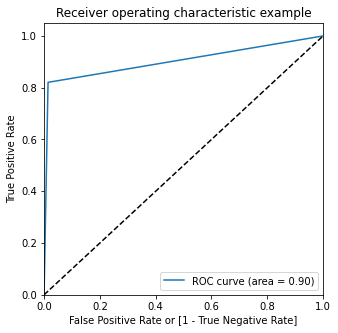

In [93]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.ConversionPred)

In [95]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.876623  0.970397  0.818841
0.2   0.2  0.921150  0.954177  0.900800
0.3   0.3  0.929808  0.932279  0.928286
0.4   0.4  0.937848  0.920925  0.948276
0.5   0.5  0.938621  0.900649  0.962019
0.6   0.6  0.936920  0.878751  0.972764
0.7   0.7  0.931200  0.851582  0.980260
0.8   0.8  0.922851  0.820762  0.985757
0.9   0.9  0.901670  0.758313  0.990005


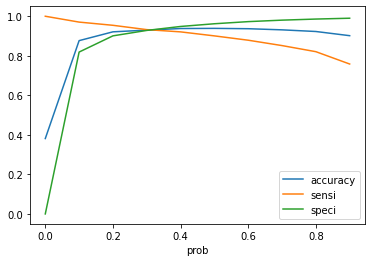

In [96]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [97]:
# From the curve above, 0.32 is the optimum point to take it as a cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Convertion_Prob.map( lambda x: 1 if x > 0.32 else 0)
y_train_pred_final.head()

,Converted,Convertion_Prob,LeadID,ConversionPred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005944,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.601898,6795,0,1,1,1,1,1,1,1,0,0,0,1
2,0,0.003806,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.247886,8105,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.121383,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [98]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9316635745207174

In [99]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3731,  271],
       [ 171, 2295]])

In [100]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [101]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9306569343065694

In [102]:
# Let us calculate specificity
TN / float(TN+FP)

0.9322838580709645

In [103]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.06771614192903548


In [104]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8943881527669525


In [105]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9561763198359815


In [106]:
# Find Precision and Recall
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8943881527669525

In [107]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9306569343065694

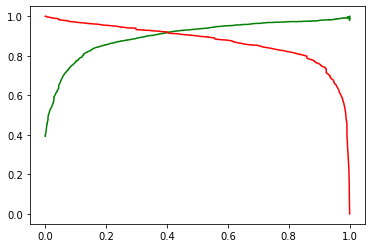

In [108]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convertion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Prediction on the test set

In [109]:
X_test[['TotalVisits','TimeSpent','PageVisited','ActivityScore','ProfileScore']] = scaler.transform(X_test[['TotalVisits','TimeSpent','PageVisited','ActivityScore','ProfileScore']])

In [110]:
# col = col.drop(['Tags_Lateral student','Tags_number not provided','Tags_wrong number given','Tags_Not doing further education'], 1)
X_test = X_test[col]
X_test.head()

,TimeSpent,ActivityScore,ProfileScore,LeadSource_Welingak Website,LastActivity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lateral student,Tags_Lost to EINS,Tags_OtherTags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_number not provided,Tags_switched off,Tags_wrong number given,LeadQuality_Worst,NotableActivity_Modified,NotableActivity_Olark Chat Conversation,MattersMost_OtherImportance
4269,0.546486,0.000000,0.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2376,0.000000,0.833333,0.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7766,0.031892,0.888889,0.75,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9199,0.000000,0.944444,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4359,0.000000,0.000000,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [111]:
X_test_sm = sm.add_constant(X_test)

In [112]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.695912
2376    0.992610
7766    0.969523
9199    0.012874
4359    0.923117
9186    0.994786
1631    0.981339
8963    0.956764
8007    0.013017
5324    0.993044
dtype: float64

In [113]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.695912
2376,0.992610
7766,0.969523
9199,0.012874
4359,0.923117


In [114]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [115]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [116]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,1,4269,0.695912
1,1,2376,0.992610
2,1,7766,0.969523
3,0,9199,0.012874
4,1,4359,0.923117


In [117]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convertion_Prob'})

y_pred_final.head()

,Converted,LeadID,Convertion_Prob
0,1,4269,0.695912
1,1,2376,0.992610
2,1,7766,0.969523
3,0,9199,0.012874
4,1,4359,0.923117


In [118]:
y_pred_final['final_predicted'] = y_pred_final.Convertion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final.head()

,Converted,LeadID,Convertion_Prob,final_predicted
0,1,4269,0.695912,1
1,1,2376,0.992610,1
2,1,7766,0.969523,1
3,0,9199,0.012874,0
4,1,4359,0.923117,1


In [119]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9383116883116883

In [120]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1577,  100],
       [  71, 1024]])

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9351598173515981

In [123]:
# Let us calculate specificity
TN / float(TN+FP)

0.9403697078115683

In [124]:
# As can be seen from the above, both train and test set model values are consistent.  This means that our model is
# stable and predictable.

In [125]:
# Merging the results to the original data set

y_train_pred_final = y_train_pred_final.sort_index()
y_pred_final = y_pred_final.sort_index()
result = pd.concat([y_train_pred_final,y_pred_final])
result.head()  
#leads_data_final = pd.merge(leads_data_copy,result[['Convertion_Prob','final_predicted']],how = 'left',left_index = True, right_index = True)
#leads_data_final.head()

,Converted,Convertion_Prob,LeadID,ConversionPred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.005944,1871,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0.601898,6795,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,0,0.003806,3516,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0.247886,8105,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0.121383,3934,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [126]:
result.shape

(9240, 15)

In [127]:
result.to_csv("result.csv", sep='\t')